

# **1.importing Libraries**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import re
import string
import seaborn as sns

# 2.**Reading  datasets**

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_real = pd.read_csv("True.csv")

# 3.**Calculate Number of News**

In [3]:
print("Number of Fake News is = ",df_fake.title.count())
print("Number of Real News is = ",df_real.title.count())

Number of Fake News is =  23481
Number of Real News is =  21417


# **4.Exploratry Data Analysis**

In [4]:
df_fake.head(5)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [5]:
df_real.head(5)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [6]:
df_real.shape

(21417, 4)

In [7]:
df_fake.shape

(23481, 4)

In [8]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


# 5.  **Add new Column (class=Label)**

In [10]:
df_fake["class"] = 0
df_real["class"] = 1

In [11]:
df_fake.head(10)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   
5   Racist Alabama Cops Brutalize Black Boy While...   
6   Fresh Off The Golf Course, Trump Lashes Out A...   
7   Trump Said Some INSANELY Racist Stuff Inside ...   
8   Former CIA Director Slams Trump Over UN Bully...   
9   WATCH: Brand-New Pro-Trump Ad Features So Muc...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   
5  The number of cases of cops brutalizing and ki...    News   
6  Donald Trump spent a good portion of his day a...    News   
7  In the wake of yet another court decision that...    News   
8  Many people have raised the alarm regarding th...    News   
9  Just when you might have thought we d get a br...    News   

                date  class  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  
5  December 25, 2017      0  
6  December 23, 2017      0  
7  December 23, 2017      0  
8  December 22, 2017      0  
9  December 21, 2017      0

In [12]:
df_real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  class  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1

In [13]:
df_fake.shape 


(23481, 5)

In [14]:
df_real.shape

(21417, 5)

# 6.**Merging datasets  into one**

In [15]:
df_merge = pd.concat([df_fake, df_real], axis =0 )
df_merge.head(10)

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   
5   Racist Alabama Cops Brutalize Black Boy While...   
6   Fresh Off The Golf Course, Trump Lashes Out A...   
7   Trump Said Some INSANELY Racist Stuff Inside ...   
8   Former CIA Director Slams Trump Over UN Bully...   
9   WATCH: Brand-New Pro-Trump Ad Features So Muc...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   
5  The number of cases of cops brutalizing and ki...    News   
6  Donald Trump spent a good portion of his day a...    News   
7  In the wake of yet another court decision that...    News   
8  Many people have raised the alarm regarding th...    News   
9  Just when you might have thought we d get a br...    News   

                date  class  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  
5  December 25, 2017      0  
6  December 23, 2017      0  
7  December 23, 2017      0  
8  December 22, 2017      0  
9  December 21, 2017      0

# **7.Counts Number of News**

In [16]:
df_merge.shape

(44898, 5)

# 8.**Check if Data Contains Null value or not**

In [17]:
print(df_merge.isnull().sum())  # printing sum of null values 

title      0
text       0
subject    0
date       0
class      0
dtype: int64


In [18]:
import plotly.express as px
sub_check=df_merge.groupby('subject').apply(lambda x:x['subject'].count()).reset_index(name='Counts')
fig=px.bar(sub_check,x='subject',y='Counts',color='Counts',title='Count of News Articles by type')
fig.show()

# **9.showing null value in heatmap plot**

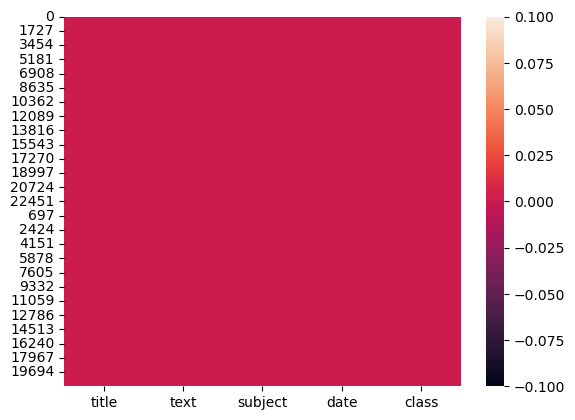

In [19]:
sns.heatmap(df_merge.isna())   #showing null value in heatmap plot
plt.show()

In [20]:
import plotly.express as px

# Assuming df_merge contains your data with 'class' column where 1 is real and 0 is fake
# Create a new column 'Class_Label' to map the class values to labels
df_merge['Class_Label'] = df_merge['class'].map({0: 'Fake', 1: 'Real'})

# Create the pie chart using Plotly Express
fig = px.pie(df_merge, names='Class_Label', title='Proportion of Real vs. Fake News')

# Show the pie chart
fig.show()

# **10.plot that Counts  real, fake news**

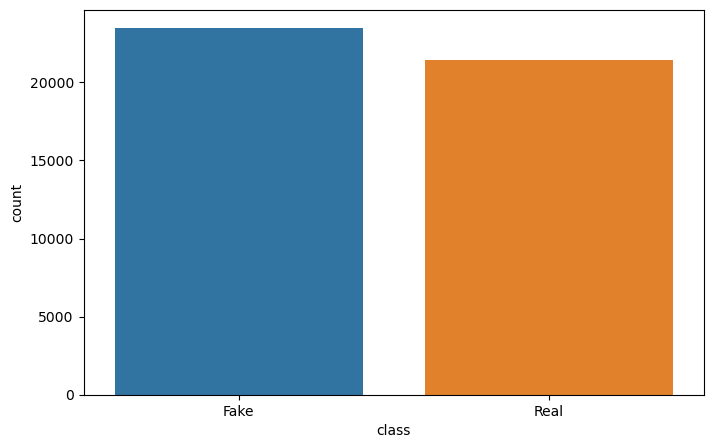

In [21]:
# Assuming df_merge contains your data with 'class' column where 1 is real and 0 is fake
# Create a countplot with custom labels
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df_merge)

# Set custom x-axis tick labels
plt.xticks(ticks=[0, 1], labels=['Fake', 'Real'])

# Show the plot
plt.show()
df_merge = df_merge.drop(["Class_Label"], axis = 1)

In [22]:
# pip install wordcloud

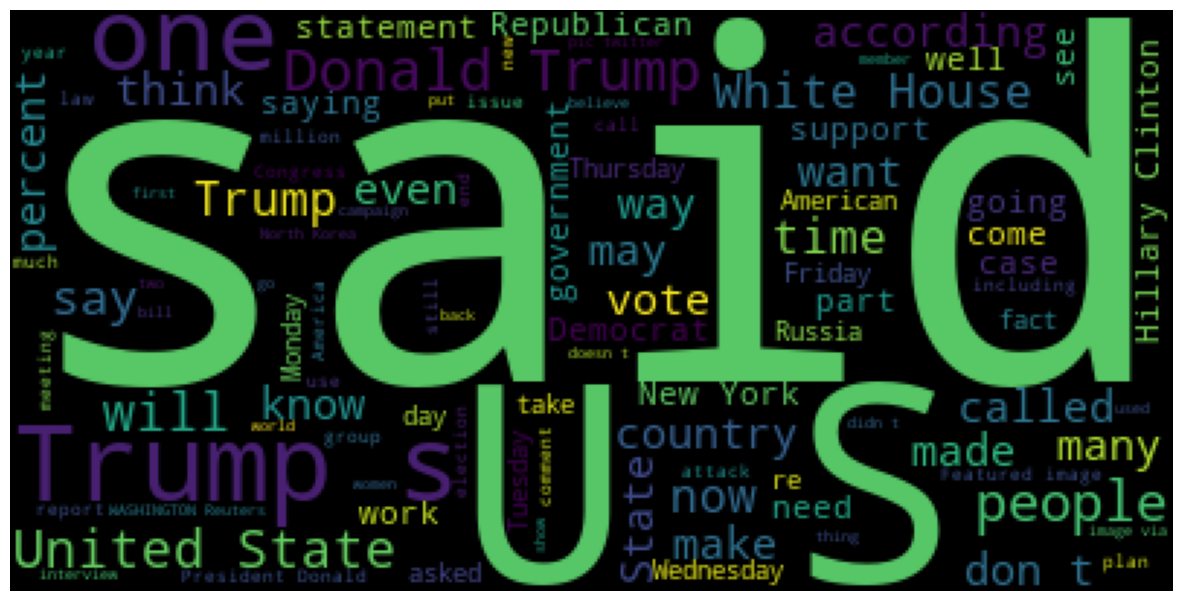

In [23]:
from wordcloud import WordCloud 
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42)
wc.generate(' '.join(df_merge['text']))
plt.figure(figsize = (15, 15))
plt.imshow(wc)
plt.axis('off')
plt.show()

**Shuffling Data**

In [24]:
df = df_merge.sample(frac = 1)

In [25]:
df.head(10)

title  \
792     Russian Lawyer Willing To Testify In Front Of...   
634    Jane Goodall urges U.S. Senate to halt quest f...   
16031  German police arrest Syrian suspect, avert 'ma...   
21823  SHOCKING VIDEOTAPED INTERVIEW WITH BARACK HUSS...   
9580   Brexit would hurt Britain, EU and global econo...   
8459    Trump Spokeswoman: I Called Obama ‘Head Negro...   
23244  Ron Paul: Syria Has Been in Chaos Ever Since O...   
19681  WATCH OBAMA AWKWARDLY AND ANGRILY Tell Audienc...   
17685  DIAMOND and SILK Have Message For GOP Candidat...   
18678  VIDEO: HARLEM BAR Kicks Customers Out For Wear...   

                                                    text       subject  \
792    Donald Trump Jr., Paul Manafort, Jared Kushner...          News   
634    WASHINGTON (Reuters) - British primatologist J...  politicsNews   
16031  BERLIN (Reuters) - German police arrested a 19...     worldnews   
21823  In a shocking interview with Joel Gilbert, pro...     left-news   
9580   BERLIN (Reuters) - If Britain were to leave th...  politicsNews   
8459   Donald Trump s ridiculous stunt on Thursday ha...          News   
23244  21st Century Wire says Ron Paul told RT that t...   Middle-east   
19681  Obama awkwardly and kind of angrily tells the ...     left-news   
17685  After Ed Gillespie lost the VA Governor s race...     left-news   
18678  A large group of very diverse young adults who...     left-news   

                     date  class  
792         July 21, 2017      0  
634    November 14, 2017       1  
16031   October 31, 2017       1  
21823        Apr 26, 2015      0  
9580        May 12, 2016       1  
8459     January 29, 2016      0  
23244  September 29, 2016      0  
19681         Nov 4, 2016      0  
17685         Nov 7, 2017      0  
18678         May 6, 2017      0

**Columns of Data**

In [26]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [27]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


# 11.**Droping Not use Columns**

In [28]:
df = df_merge.drop(["title", "subject","date"], axis = 1) # drop (Title,Subject,Date) from dataset

**rest Index of data**

In [29]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [30]:
df.columns

Index(['text', 'class'], dtype='object')

# 12.**Preprocessing on data and removing special character**

In [31]:
def wordopt(text):
    #This line converts all text to lowercase. This is a common preprocessing step to ensure that the text is case-insensitive.
    text = text.lower()
    #This line uses the re.sub function from the Python re module to remove text enclosed in square brackets and the brackets themselves.
    #This is typically done to remove text that might represent metadata or references in square brackets.
    text = re.sub('\[.*?\]', '', text)
    #This line uses regular expressions (re.sub) to replace any non-word characters (e.g., punctuation) with a space.
    #This effectively separates words and removes punctuation.
    text = re.sub("\\W"," ",text) 
    #This line removes URLs or web links from the text. 
    #It uses a regular expression to find and remove URLs and any text starting with "www."
    text = re.sub('https?://\S+|www\.\S+', '', text)
    #This line removes HTML tags and their contents from the text.
    #It uses a regular expression to match and remove anything enclosed in angle brackets, which is typical in HTML tags.
    text = re.sub('<.*?>+', '', text)
    #This line removes punctuation from the text. 
    #It uses the string.punctuation constant to identify punctuation characters and removes them.
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #This line removes newline characters from the text.
    #Newline characters can be replaced with spaces or removed depending on the specific text preprocessing needs.
    text = re.sub('\n', '', text)
    #This line removes words containing digits. It uses a regular expression to match and remove words that contain digits.
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [32]:
df["text"] = df["text"].apply(wordopt)

In [33]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

In [34]:
#defining stopwords
stop_words = stopwords.words('english')
stop_words.extend(['use', 're', 'edu', 'from', 'also'])


In [35]:
# This imports the regular expression (regex) library, which can be used for text pattern matching and manipulation.
import re
# This imports two stemmers/lemmatizers from the NLTK library. These are tools for reducing words to their root/base form. 
# PorterStemmer is a stemming algorithm, and WordNetLemmatizer is a lemmatization tool.
from nltk.stem import PorterStemmer, WordNetLemmatizer
# This imports a list of common stopwords from the NLTK library. 
# Stopwords are words that are often removed from text because they are considered non-informative (e.g., "the," "is," "and").
from nltk.corpus import stopwords
# These imports are for tokenization, which is the process of splitting text into words or sentences. 
from nltk.tokenize import word_tokenize, sent_tokenize
# This imports the Gensim library, which is commonly used for topic modeling and document similarity analysis.
import gensim
#  This imports a utility function from Gensim for simple text preprocessing.
from gensim.utils import simple_preprocess
# This imports Gensim's built-in list of stopwords, which can be used to filter out common stopwords from text data.
from gensim.parsing.preprocessing import STOPWORDS
#function which stop words and the words less than 2 characters
# for token in gensim.utils.simple_preprocess(text): Tokenizes the input text using Gensim's simple_preprocess function,
# which converts text to lowercase and splits it into words. The loop then iterates through these tokens.

# if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words: Checks each token against three conditions:

# It is not in Gensim's built-in list of stopwords (gensim.parsing.preprocessing.STOPWORDS).
# It has a length greater than 3 characters. This condition filters out very short words.
# It is not in the NLTK stopwords list (stop_words), which was imported earlier.
# If a token passes all these conditions, it is appended to the result list.

# Finally, the function returns the result list, which contains the filtered and cleaned words from the input text.
def remove_stop_words (text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
      result.append(token)
  return result

In [36]:
df = df.sample(frac = 1)
df.head(10)

text  class
19914  wow just wow  this is what happens when politi...      0
15506   if local law enforcement begins to act like i...      0
27314  washington  reuters    russia s attempts to in...      1
42539  new york  reuters    the supreme court signale...      1
25534  phoenix  reuters    u s  president donald trum...      1
12805  donald trump bragged in vulgar terms about kis...      0
14683  a new campaign video was just released from th...      0
17591  with all of the stories of  tv hosts involved ...      0
19489   disrupt the inauguration  the majority have s...      0
13364  hillary s pawn in the  election is a controver...      0

In [37]:
df.columns

Index(['text', 'class'], dtype='object')

In [38]:
df['text'] = df['text'].apply(remove_stop_words)
df['text'] = df['text'].apply(lambda x: " ".join(x))


In [39]:
df.head(15)

text  class
19914  happens political candidates divide nations co...      0
15506  local enforcement begins like immigration offi...      0
27314  washington reuters russia attempts interfere f...      1
42539  york reuters supreme court signaled monday dis...      1
25534  phoenix reuters president donald trump express...      1
12805  donald trump bragged vulgar terms kissing grop...      0
14683  campaign video released donald trump campaign ...      0
17591  stories hosts involved sexual misconduct myste...      0
19489  disrupt inauguration majority spoken nearly mi...      0
13364  hillary pawn election controversial muslim cho...      0
21389  lack compassion families dead americans hillar...      0
43582  london reuters british government said thursda...      1
5727   devastating round political polls shows donald...      0
28400  washington reuters senior boeing executive pat...      1
21097  good support hillary clinton democratic voters...      0

**SPLITTING DATA**

In [40]:
# from sklearn.utils import shuffle

# x,y = shuffle(df["text"], df["class"], random_state=42)
x = df["text"]
y = df["class"]

In [41]:
x.head()

19914    happens political candidates divide nations co...
15506    local enforcement begins like immigration offi...
27314    washington reuters russia attempts interfere f...
42539    york reuters supreme court signaled monday dis...
25534    phoenix reuters president donald trump express...
Name: text, dtype: object

In [42]:
y.head()

19914    0
15506    0
27314    1
42539    1
25534    1
Name: class, dtype: int64

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier 
import matplotlib.pyplot as plt
from sklearn import metrics 

# 13.**Spliting Data into Training and Testing for building Model**

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [45]:
x_train.head()

32651    washington reuters senator dick durbin illinoi...
31633    reuters members maná spanish language band emb...
8683     person want mess schumer badass matter young c...
39526    berlin reuters germany greens need compromise ...
36127    cairo reuters arab foreign ministers late satu...
Name: text, dtype: object

In [46]:
x_test.head()

42890    buenos aires reuters argentine president mauri...
1227     donald trump asked republicans tweet director ...
8966     money foreign nation united states senator rep...
20593    moderate tolerant sadiq khan acts london mayor...
24216    beijing reuters china united states created mi...
Name: text, dtype: object

In [47]:
y_train.head()

32651    1
31633    1
8683     0
39526    1
36127    1
Name: class, dtype: int64

In [48]:
y_test.head()

42890    1
1227     0
8966     0
20593    0
24216    1
Name: class, dtype: int64

### Implement TfidfVectorizer
- Use TfidfVectorizer to use the fit_transform method to convert x_train into TF-IDF vectors. 
- This method both fits the vectorizer to your training data  for learning the vocabulary and IDF values and transforms the training data into TF-IDF vectors. 
- xv_train will contain the TF-IDF representations of training documents.  Fitting the vectorizer to the training data, use the transform method to convert test data (x_test) into TF-IDF vectors. 
- This step applies the same vocabulary and IDF values learned from the training data to the test data, ensuring consistency in the vectorization process. xv_test will contain the TF-IDF representations of test documents.


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [50]:
print(xv_test)

  (0, 86175)	0.013075119863081923
  (0, 86164)	0.01165557000299529
  (0, 85022)	0.02748002055046162
  (0, 84149)	0.013684958363362762
  (0, 83924)	0.030191068093552095
  (0, 83876)	0.02756187748663985
  (0, 83371)	0.03754589025305721
  (0, 83278)	0.05688269186934861
  (0, 83266)	0.03206278180289043
  (0, 83017)	0.030983704870760357
  (0, 82730)	0.043624357719575305
  (0, 81317)	0.09710697615680193
  (0, 81133)	0.0319822070651903
  (0, 79772)	0.014908269660146292
  (0, 79240)	0.029664530546111567
  (0, 78875)	0.03617113154548624
  (0, 78344)	0.04404092372672745
  (0, 78242)	0.02264240719361324
  (0, 77897)	0.011736948784797483
  (0, 77728)	0.030808170172371883
  (0, 77702)	0.04848463427789285
  (0, 76999)	0.03168710284332829
  (0, 76884)	0.03966232262184126
  (0, 76262)	0.03406144920930361
  (0, 75851)	0.028743970104242008
  :	:
  (13469, 13001)	0.11089174364343629
  (13469, 12726)	0.041720681511411645
  (13469, 11721)	0.04445218049971869
  (13469, 11461)	0.04934720028674764
  (13469, 1

In [51]:
print(vectorization.vocabulary_)

{'washington': 83816, 'reuters': 64956, 'senator': 68971, 'dick': 20190, 'durbin': 22492, 'illinois': 35868, 'called': 11035, 'congress': 15628, 'pass': 56760, 'control': 16055, 'legislative': 43634, 'body': 8613, 'complicit': 15228, 'killing': 41341, 'power': 59672, 'second': 68659, 'ranked': 62363, 'democrat': 19281, 'senate': 68967, 'said': 67009, 'line': 44418, 'allow': 2250, 'dangerous': 18031, 'people': 57443, 'guns': 31895, 'america': 2620, 'change': 12640, 'coming': 14936, 'days': 18400, 'stand': 73288, 'hate': 33005, 'terrorism': 76944, 'horrific': 34804, 'violence': 82933, 'members': 48403, 'maná': 46655, 'spanish': 72478, 'language': 42942, 'band': 5900, 'embarking': 23563, 'hope': 34737, 'influential': 36907, 'series': 69192, 'performances': 57544, 'latino': 43137, 'tour': 78602, 'seeking': 68763, 'encourage': 23863, 'latinos': 43138, 'polls': 59174, 'presidential': 60109, 'election': 23277, 'proud': 60889, 'hand': 32493, 'celebration': 12240, 'suggesting': 74768, 'vote': 8

# 14.**Classification**

**Random Forest Classificafier**

In [52]:
from sklearn.ensemble import RandomForestClassifier

import time

start_time = time.time()

# Create and train the Random Forest Classifier
RF = RandomForestClassifier()
RF.fit(xv_train, y_train)

# Measure the time taken for training
training_time = time.time() - start_time
print(f"Random Forest training time: {training_time} seconds")


Random Forest training time: 85.57025218009949 seconds


In [53]:
pred_rf=RF.predict(xv_test)

In [54]:
RF.score(xv_test, y_test)

0.9916109873793616

In [55]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Calculate the classification report
report_rf = classification_report(y_test, pred_rf, target_names=['Class 0', 'Class 1'], output_dict=True)

# Convert the classification report to percentages
for key, value in report_rf.items():
    if isinstance(value, dict):
        for inner_key, inner_value in value.items():
            if inner_key != 'support':  # Exclude 'support' from conversion
                report_rf[key][inner_key] = f"{inner_value * 100:.2f}%"  # Convert to percentage format

# Calculate accuracy and convert it to a percentage
accuracy_rf = accuracy_score(y_test, pred_rf) * 100

# Create a dictionary to include accuracy
report_rf['accuracy'] = {"precision": "",
                         "recall": "",
                         "f1-score": f"{accuracy_rf:.2f}%",
                         "support": len(y_test)}

# Convert the modified classification report to a pandas DataFrame for tabular format
df_report_rf = pd.DataFrame(report_rf)

# Transpose the DataFrame for better tabular representation
df_report_rf = df_report_rf.T

# Display the DataFrame
print("Modified Classification Report for Random Forest (in Percentage and Tabular Format):")
print(df_report_rf)
end_time = time.time()
# Calculate the elapsed time
rf_time = end_time - start_time

# Print the elapsed time in seconds
print(f"Elapsed time for Random Forest model training and evaluation: {rf_time} seconds")

Modified Classification Report for Random Forest (in Percentage and Tabular Format):
             precision  recall f1-score support
Class 0         99.38%  99.03%   99.20%    7087
Class 1         98.92%  99.31%   99.12%    6383
accuracy                         99.16%   13470
macro avg       99.15%  99.17%   99.16%   13470
weighted avg    99.16%  99.16%   99.16%   13470
Elapsed time for Random Forest model training and evaluation: 86.9245274066925 seconds


**Decision Tree Classifier**

In [56]:
from sklearn.tree import DecisionTreeClassifier
import time

start_time = time.time()
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [57]:
pred_dt = DT.predict(xv_test)

In [58]:
DT.score(xv_test, y_test)

0.9944320712694877

In [59]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Calculate the classification report
report_dt = classification_report(y_test, pred_dt, target_names=['Class 0', 'Class 1'], output_dict=True)

# Convert the classification report to percentages
for key, value in report_dt.items():
    if isinstance(value, dict):
        for inner_key, inner_value in value.items():
            if inner_key != 'support':  # Exclude 'support' from conversion
                report_dt[key][inner_key] = f"{inner_value * 100:.2f}%"  # Convert to percentage format

# Calculate accuracy and convert it to a percentage
accuracy_dt = accuracy_score(y_test, pred_dt) * 100

# Create a dictionary to include accuracy
report_dt['accuracy'] = {"precision": "",
                         "recall": "",
                         "f1-score": f"{accuracy_dt:.2f}%",
                         "support": len(y_test)}

# Convert the modified classification report to a pandas DataFrame for tabular format
df_report_dt = pd.DataFrame(report_dt)

# Transpose the DataFrame for better tabular representation
df_report_dt = df_report_dt.T

# Display the DataFrame
print("Modified Classification Report for Decision Tree (in Percentage and Tabular Format):")
print(df_report_dt)

end_time = time.time()
# Calculate the elapsed time
dt_time = end_time - start_time

# Print the elapsed time in seconds
print(f"Elapsed time for Decision Tree model training and evaluation: {dt_time} seconds")

Modified Classification Report for Decision Tree (in Percentage and Tabular Format):
             precision  recall f1-score support
Class 0         99.41%  99.53%   99.47%    7087
Class 1         99.48%  99.34%   99.41%    6383
accuracy                         99.44%   13470
macro avg       99.45%  99.44%   99.44%   13470
weighted avg    99.44%  99.44%   99.44%   13470
Elapsed time for Decision Tree model training and evaluation: 21.64294958114624 seconds


**Naive Bayes Classifier**

In [60]:
from sklearn.naive_bayes import MultinomialNB
import time

start_time = time.time()
nb = MultinomialNB()
nb.fit(xv_train , y_train)
pred_nb = nb.predict(xv_test)
accuracy_score(y_test , pred_nb)

0.9325167037861916

In [61]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Calculate the classification report
report_nb = classification_report(y_test, pred_nb, target_names=['Class 0', 'Class 1'], output_dict=True)

# Convert the classification report to percentages
for key, value in report_nb.items():
    if isinstance(value, dict):
        for inner_key, inner_value in value.items():
            if inner_key != 'support':  # Exclude 'support' from conversion
                report_nb[key][inner_key] = f"{inner_value * 100:.2f}%"  # Convert to percentage format

# Calculate accuracy and convert it to a percentage
accuracy_nb = accuracy_score(y_test, pred_nb) * 100

# Create a dictionary to include accuracy
report_nb['accuracy'] = {"precision":"",
                         "recall":"" ,
                         "f1-score":  f"{accuracy_nb:.2f}%",
                         "support": len(y_test)}

# Convert the modified classification report to a pandas DataFrame for tabular format
df_report_nb = pd.DataFrame(report_nb)

# Transpose the DataFrame for better tabular representation
df_report_nb = df_report_nb.T

# Display the DataFrame
print("Modified Classification Report for Naive Bayes (in Percentage and Tabular Format):")
print(df_report_nb)

end_time = time.time()
# Calculate the elapsed time
nb_time = end_time - start_time

# Print the elapsed time in seconds
print(f"Elapsed time for Naive Bayes model training and evaluation: {nb_time} seconds")

Modified Classification Report for Naive Bayes (in Percentage and Tabular Format):
             precision  recall f1-score support
Class 0         93.57%  93.61%   93.59%    7087
Class 1         92.90%  92.86%   92.88%    6383
accuracy                         93.25%   13470
macro avg       93.23%  93.23%   93.23%   13470
weighted avg    93.25%  93.25%   93.25%   13470
Elapsed time for Naive Bayes model training and evaluation: 0.06715631484985352 seconds


In [62]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Dark2):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("normalize confusion matrix")
  else:
    print('confusion matric,without normalization')

  thresh = cm.max() / 2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="yellow" if cm[i, j] > thresh else "red")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')    

# **15.Confusion Matrix**

Accuracy: 99.16%
confusion matric,without normalization


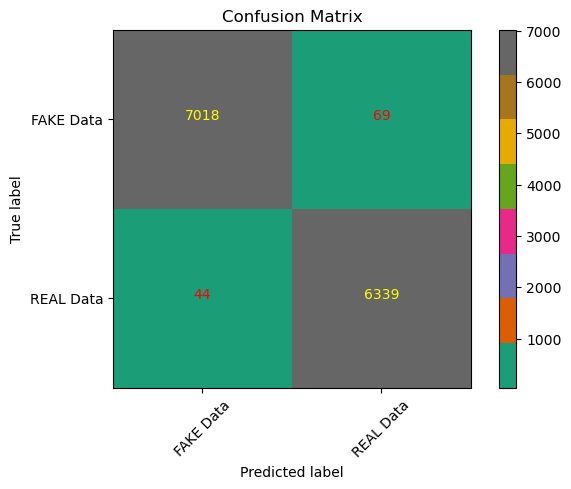

In [63]:
#Predict and calculate accuracy
# runing on Random Forest
pred_rf=RF.predict(xv_test)
score = RF.score(xv_test, y_test)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test,pred_rf)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Accuracy: 99.44%
confusion matric,without normalization


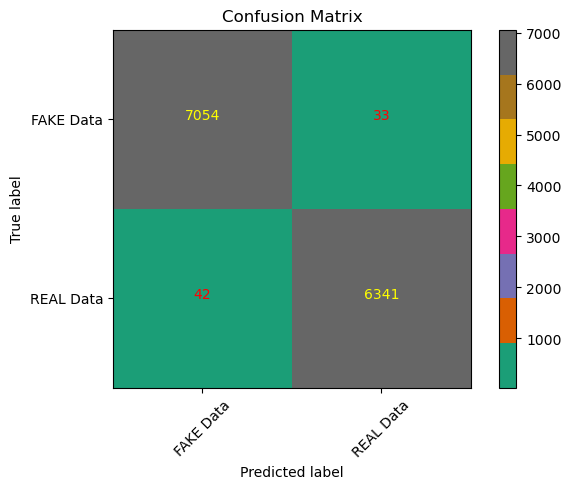

In [64]:
pred_dt=DT.predict(xv_test)
score = DT.score(xv_test, y_test)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test,pred_dt)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

Accuracy: 93.25%
confusion matric,without normalization


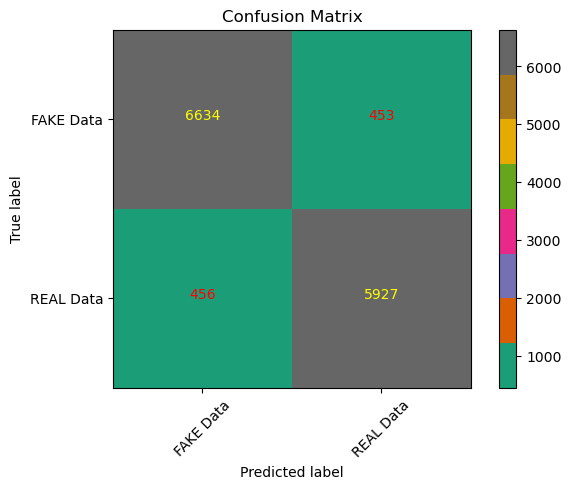

In [65]:
pred_nb=nb.predict(xv_test)
score = nb.score(xv_test, y_test)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test,pred_nb)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [66]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

# Your code here



df_auc = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)
df_auc = df_auc.append({'classifiers':"Random Forest",
               'fpr':fpr_rf, 
               'tpr':tpr_rf, 
               'auc':auc_rf}, ignore_index=True) 


fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, pred_dt)
auc_dt = auc(fpr_dt, tpr_dt)
df_auc = df_auc.append({'classifiers': "Decision Tree",
               'fpr':fpr_dt, 
               'tpr':tpr_dt, 
               'auc':auc_dt}, ignore_index=True) 


fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, pred_nb)
auc_nb = auc(fpr_nb, tpr_nb)
df_auc= df_auc.append({'classifiers': "Naive Bayes",
               'fpr':fpr_nb, 
               'tpr':tpr_nb, 
               'auc':auc_nb}, ignore_index=True)
# Re-enable warnings if needed
warnings.filterwarnings("default")

In [67]:

# Show ROC curve plot
def plot_ROC(pred_models):    
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    for i in pred_models.index:
        plt.plot(pred_models.loc[i]['fpr'], 
                 pred_models.loc[i]['tpr'], 
                 label=pred_models.loc[i]['classifiers'] +", AUC={:.3f}".format(pred_models.loc[i]['auc']))


    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    

# Show ROC curve plot
def plot_ROC_zoom(pred_models):
    # Zoom in view of the upper left corner.
    plt.figure(1)
    plt.xlim(0, 0.2)
    plt.ylim(0.8, 1)
    plt.plot([0, 1], [0, 1], 'k--')
    for i in pred_models.index:
        plt.plot(pred_models.loc[i]['fpr'], 
                 pred_models.loc[i]['tpr'], 
                 label=pred_models.loc[i]['classifiers'] +", AUC={:.3f}".format(pred_models.loc[i]['auc']))
                 
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve (zoomed in at top left)')
    plt.legend(loc='best')
    plt.show()

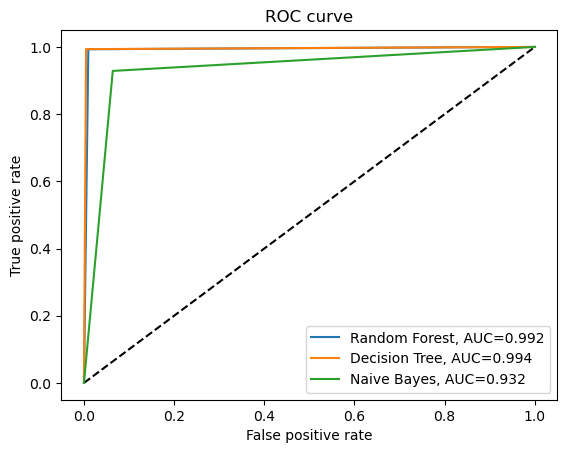

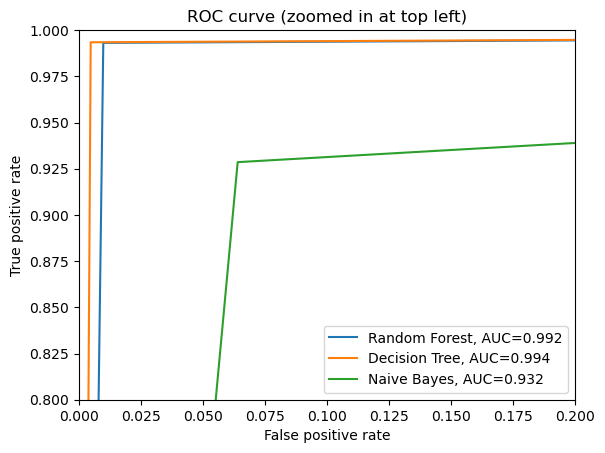

In [68]:
# The first plot is a original view of the graph
plot_ROC(df_auc)
# The second plot is a zoom-in view of the upper left corner of the graph.
plot_ROC_zoom(df_auc)

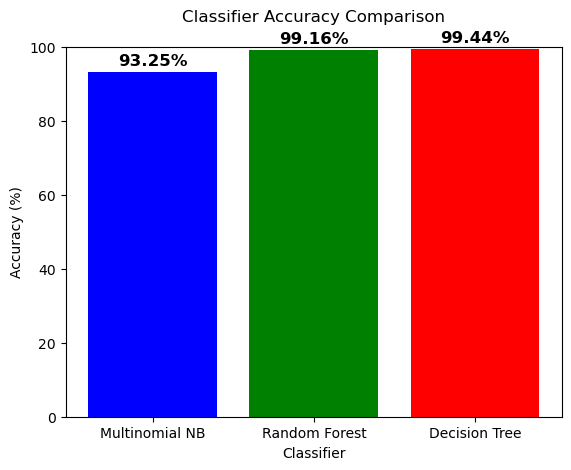

In [69]:
import matplotlib.pyplot as plt

# Calculate the accuracy of each classifier
nb_accuracy = accuracy_score(y_test, pred_nb) * 100
rf_accuracy = accuracy_score(y_test, pred_rf) * 100
dt_accuracy = accuracy_score(y_test, pred_dt) * 100

# Create a bar graph to visualize the accuracies
classifiers = ['Multinomial NB', 'Random Forest', 'Decision Tree']
accuracies = [nb_accuracy, rf_accuracy, dt_accuracy]

plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')  # Update the y-axis label
plt.title('Classifier Accuracy Comparison\n')

# Display accuracy values on top of each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f'{acc:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylim(0, 100)  # Set y-axis limits to percentage scale (0-100)
plt.show()


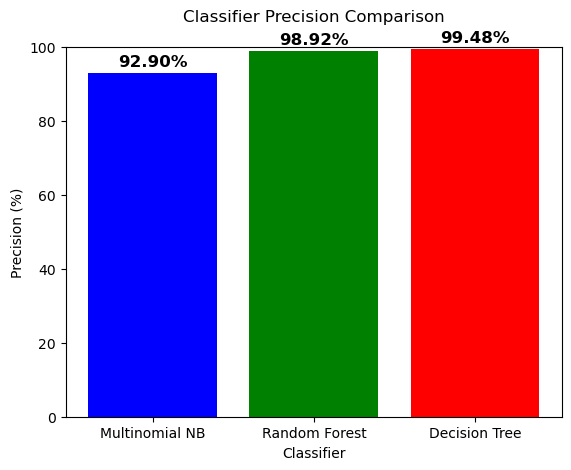

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score

# Calculate the precision of each classifier
nb_precision = precision_score(y_test, pred_nb) * 100
rf_precision = precision_score(y_test, pred_rf) * 100
dt_precision = precision_score(y_test, pred_dt) * 100

# Create a bar graph to visualize the precision values
classifiers = ['Multinomial NB', 'Random Forest', 'Decision Tree']
precisions = [nb_precision, rf_precision, dt_precision]

plt.bar(classifiers, precisions, color=['blue', 'green', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Precision (%)')  # Update the y-axis label
plt.title('Classifier Precision Comparison\n')

# Display precision values on top of each bar
for i, precision in enumerate(precisions):
    plt.text(i, precision + 1, f'{precision:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylim(0, 100)  # Set y-axis limits to percentage scale (0-100)
plt.show()


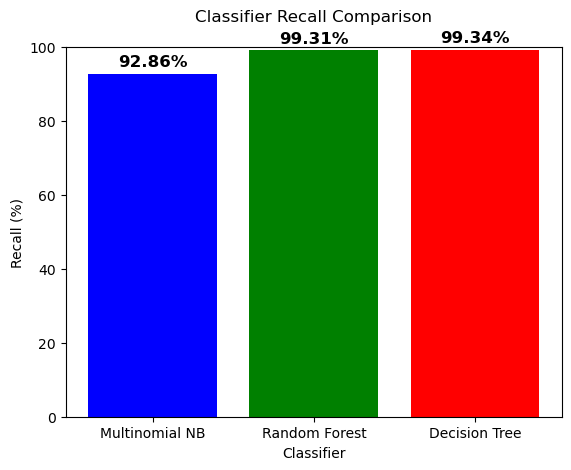

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

# Calculate the recall of each classifier
nb_recall = recall_score(y_test, pred_nb) * 100
rf_recall = recall_score(y_test, pred_rf) * 100
dt_recall = recall_score(y_test, pred_dt) * 100

# Create a bar graph to visualize the recall values
classifiers = ['Multinomial NB', 'Random Forest', 'Decision Tree']
recalls = [nb_recall, rf_recall, dt_recall]

plt.bar(classifiers, recalls, color=['blue', 'green', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Recall (%)')  # Update the y-axis label
plt.title('Classifier Recall Comparison\n')

# Display recall values on top of each bar
for i, recall in enumerate(recalls):
    plt.text(i, recall + 1, f'{recall:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylim(0, 100)  # Set y-axis limits to percentage scale (0-100)
plt.show()


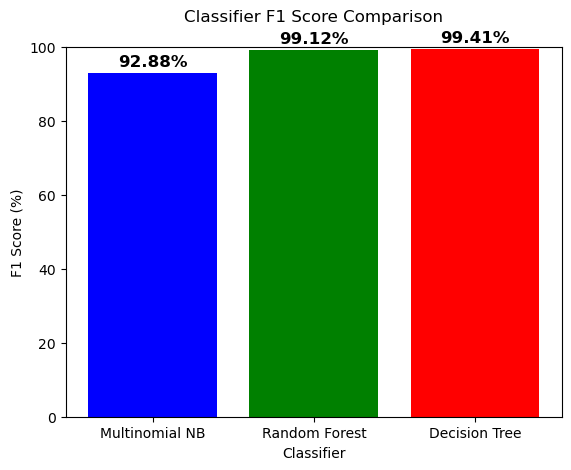

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Calculate the F1 scores for each classifier
nb_f1_score = f1_score(y_test, pred_nb) * 100
rf_f1_score = f1_score(y_test, pred_rf) * 100
dt_f1_score = f1_score(y_test, pred_dt) * 100

# Create a bar graph to visualize the F1 scores as percentages
classifiers = ['Multinomial NB', 'Random Forest', 'Decision Tree']
f1_scores = [nb_f1_score, rf_f1_score, dt_f1_score]

plt.bar(classifiers, f1_scores, color=['blue', 'green', 'red'])
plt.xlabel('Classifier')
plt.ylabel('F1 Score (%)')  # Update the y-axis label
plt.title('Classifier F1 Score Comparison\n')

# Display F1 scores on top of each bar
for i, f1_score in enumerate(f1_scores):
    plt.text(i, f1_score + 1, f'{f1_score:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylim(0, 100)  # Set y-axis limits to the percentage scale (0-100)
plt.show()


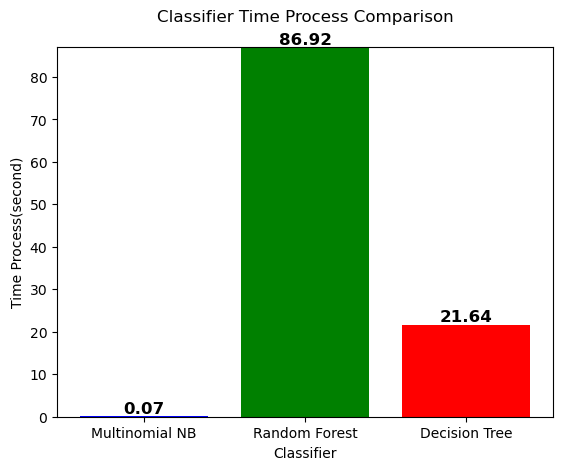

In [73]:
# Create a bar graph to visualize the F1 scores
classifiers = ['Multinomial NB', 'Random Forest', 'Decision Tree']
time_process = [nb_time, rf_time, dt_time]

plt.bar(classifiers, time_process, color=['blue', 'green', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Time Process(second)')
plt.title('Classifier Time Process Comparison\n')

# Display F1 scores on top of each bar
for i, time in enumerate(time_process):
    plt.text(i, time + 0.01, f'{time:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylim(0, max(time_process) + 0.1)
plt.show()

# **16.Test**

In [74]:
def check_news(news):
    input_data = [news]
    vectorized_input_data =vectorization.transform(input_data)
    prediction = RF.predict(vectorized_input_data)
    prediction2 = DT.predict(vectorized_input_data)
    prediction3 = nb.predict(vectorized_input_data)
    if(prediction==0):
      print("Random Forest:The News is FAKE")
    else:
      print("Random Forest:The News is REAL")
    if(prediction2==0):
      print("DecisionTreeClassifier:The News is FAKE")
    else:
      print("DecisionTreeClassifier:The News is REAL")
    if(prediction3==0):
      print("Naive Bayes:The News is FAKE")
    else:
      print("Naive Bayes:The News is REAL")


In [75]:
check_news("The biggest prize payday in science came around again Sunday evening when the Breakthrough Foundation  handed out more than $25 million in its annual prizes to more than a thousand physicists, life scientists and mathematicians. This yearâ€™s winners include five molecular biologists who won $3 million each for work in genetics and cell biology, one mathematician, a trio of string theorists who split one $3 million physics prize, and another 1, 015 physicists working on the LIGO gravitational wave detector split a special $3 million physics prize. In addition, there were six smaller â€œNew Horizonsâ€ prizes totaling $600, 000 for 10 â€œearly careerâ€ researchers, and a pair of high school students won $400, 000 apiece for making science videos. The Breakthrough Foundation was founded by Sergey Brin of Google Anne Wojcicki of 23andMe Jack Ma of Alibaba and his wife, Cathy Zhang Yuri Milner, an internet entrepreneur, and his wife, Julia Milner and Mark Zuckerberg of Facebook and his wife, Priscilla Chan. It sprang from Mr. Milnerâ€™s decision in 2012 to hand out $3 million apiece to nine theoretical physicists, in the belief that physicists are equal to rock stars and deserve to be paid and celebrated like them. Over the years, as more sponsors have joined, the prizes have spread to life sciences and mathematics. The winners each year are chosen by a committee of previous winners. For the last few years, the awards have been given out in an   ceremony held at NASAâ€™s Ames Research Center, with a variety of Hollywood celebrities, who this year include Morgan Freeman, Alicia Keys and Jeremy Irons. There were two physics prizes awarded this year. In May, Mr. Milner, the founder of the Breakthrough initiative, announced a special $3 million prize to the LIGO (for Laser Interferometer   Observatory) experiment, which detected gravitational waves from colliding black holes last year. A third of the money will be split among the three leaders of the experiment, Ronald W. P. Drever, Kip S. Thorne and Rainer Weiss. The remainder of the award money will be split among the other 1, 012 scientists on the team. In a return to the way it originally was, the regular Breakthrough prize this year is going to a trio of theorists who have made serious advances in string theory, the alleged but still unproven theory of everything, and what it might mean for black holes and the universe. They are Andrew Strominger and Cumrun Vafa from Harvard, and Joseph Polchinski of the Kavli Institute for Theoretical Physics at the University of California, Santa Barbara. According to string theory, all the forces and particles of nature are composed of tiny little wriggling strings. In 1995, Dr. Polchinski showed that the theory also contains objects of two dimensions or more, called â€œbranes,â€ short for membranes. This led to a whole new branch of cosmology, in which branes could be island universes floating in an   space like leaves in a fish tank, colliding and otherwise interacting with each other through a higher dimension. In a celebrated calculation in 1996, Dr. Strominger and Dr. Vafa used string theory to compute the information content, or entropy, of a black hole. Their result verified a prediction made by Stephen Hawking using more approximate methods that black holes would leak radiation and eventually explode. In a career spanning four decades, Jean Bourgain, a mathematician at the Institute for Advanced Study in Princeton, N. J. has published, on average, 10 papers a year, tackling some of the hardest problems in a range of mathematical fields. Some recent work includes a â€œdecoupling theoremâ€  â€”   a sort of very abstract generalization of the Pythagorean theorem applied to oscillating waves like light or radio waves. While Pythagoras merely showed how the length of the two shorter sides of a right triangle are related to the longer hypotenuse, the decoupling theorem proven by Dr. Bourgain and Ciprian Demeter of Indiana University shows similar relationships in the superposition of waves. Stephen J. Elledge, 60, is a professor of genetics and medicine at Harvard Medical School and the Brigham and Womenâ€™s Hospital in Boston and a Howard Hughes Medical Institute researcher. He received the breakthrough prize for research explaining how â€œcells sense and respond to damage in their DNA and providing insights into the development and treatment of cancer. â€ Dr. Elledge has described DNA as being constantly under attack but having the ability  â€”   he calls it a sort of chemical intelligence  â€”   to monitor its own integrity and activate various defense mechanisms. His research interests range far and wide. In 2015, he and his team reported that they had developed a test that, using less than a drop of blood, could reveal nearly every virus a person had ever been exposed to. Other scientists saw vast potential in the test, suggesting it could be used to track patterns of disease across populations and to learn more about how viruses, and the bodyâ€™s immune response to them, contribute to chronic diseases and cancer. Last year, Dr. Elledge won another major prize: the Lasker Award, which is often described as the American Nobel. Harry F. Noller helped unravel the structure of ribosomes and identify the importance of RNA to their mechanics. Ribosomes are like factories that assemble proteins within a cell. They look like a tangled mess of rubber bands and coiled wires. But by decoding their twists and folds, scientists can better understand how the genetic code gets translated. Dr. Noller is a biochemist and director of the Center for Molecular Biology of RNA at the University of California, Santa Cruz. He and his colleagues used   crystallography to obtain the first image of the ribosomeâ€™s molecular structure. His work also helped show that ribosomes are ribozymes, a type of RNA molecule that can facilitate chemical reactions. In this case, the ribozymes stitch amino acids together to build proteins. Roeland Nusse, professor of developmental biology at Stanford University and a Howard Hughes Medical Institute investigator, helped discover the first Wnt gene in 1982. The gene is part of the larger Wnt signaling pathway, which plays a crucial role in the development of embryos, stem cells, bone growth and the progression of cancer. It is also critical for    communication in adults and developing embryos. The Wnt signaling pathway is found in every branch of the animal kingdom. It is involved in things as diverse as setting off breast cancer in mice and helping orchestrate the body plan of fruit flies. It has become an important part in many aspects of biology because the molecular cascade it sets off affects the growth of the entire ecosystem of the body. Dr. Huda Zoghbi, a professor of neurology at Baylor College of Medicine, a Howard Hughes Medical Institute investigator and director of the Jan and Dan Duncan Neurological Research Institute at Texas Childrenâ€™s Hospital, discovered that a mutation to a gene known as SCA1 causes Spinocerebellar ataxia, a neurodegenerative disorder. It can rob people of their control over their hands, legs and speech. An estimated 150, 000 people in the United States currently suffer from the disease. There is no known cure and it ultimately is fatal. But insight into its inner workings may provide a way to combat its progression. Dr. Zoghbiâ€™s findings have helped provide the groundwork to fighting the disease. Dr. Zoghbi also helped uncover the culprit behind another neurodegenerative disease, Rett syndrome. This crippling condition mostly affects young girls and is often fatal. There are fewer than 1, 000 cases a year in the United States. Her team searched for the cause behind the malady for 16 years, eventually identifying it as a mutation in the gene MECP2. By identifying the gene, she also found that it plays a part in other neurological disorders, providing a starting point to fighting the diseases. Yoshinori Ohsumi, a cell biologist and honorary professor from the Institute of Innovative Research at Tokyo Institute of Technology in Japan, helped pioneer our understanding of how cells recycle themselves  â€”   known as autophagy  â€”   through his research with yeast in the 1990s. Organelles, proteins and other molecules inside the cell are constantly becoming damaged or worn out, especially as the cell divides. If too much rubbish builds up, it can become toxic and kill the cell. Autophagy is also a tool that the cell uses to refuel itself if it is starving. During autophagy, the cell produces internal garbage bags called autophagosomes that capture waste. The autophagosomes are sealed by a double membrane that keeps in the junk. They then fuse with organelles called lysosomes, which carry enzymes that help dissolve whatever is inside. Researchers think that failures in autophagy could contribute to Type 2 diabetes and certain types of cancer, as well as Alzheimerâ€™s disease and Parkinsonâ€™s disease. They also think it could help us better understand the process of aging. This year, Dr. Ohsumi won the Nobel Prize in Physiology or Medicine for illuminating the importance of cell cannibalism. In addition to the big $3 million prizes, there were six $100, 000 New Horizons prizes  â€”   half in physics and half in mathematics. The young physics winners are: Asimina Arvanitaki of the Perimeter Institute for Theoretical Physics in Ontario, Canada, Peter Graham of Stanford and Surjeet Rajendran of the University of California, Berkeley, who split one prize Simone Giombi of Princeton and Xi Yin of Harvard who split another prize and Frans Pretorius of Princeton. In mathematics, the New Horizons winners were Mohammed Abouzaid of Columbia University Hugo   of the University of Geneva and Benjamin Elias of the University of Oregon and Geordie Williamson of Kyoto University.")

Random Forest:The News is FAKE
DecisionTreeClassifier:The News is FAKE
Naive Bayes:The News is FAKE


In [76]:
check_news("WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that support education, scientific research, infrastructure, public health and environmental protection. â€œThe (Trump) administration has already been willing to say: â€˜Weâ€™re going to increase non-defense discretionary spending ... by about 7 percent,â€™â€ Meadows, chairman of the small but influential House Freedom Caucus, said on the program. â€œNow, Democrats are saying thatâ€™s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I donâ€™t see where the rationale is. ... Eventually you run out of other peopleâ€™s money,â€ he said. Meadows was among Republicans who voted in late December for their partyâ€™s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. â€œItâ€™s interesting to hear Mark talk about fiscal responsibility,â€ Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. â€œThis is one of the least ... fiscally responsible bills weâ€™ve ever seen passed in the history of the House of Representatives. I think weâ€™re going to be paying for this for many, many years to come,â€ Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or â€œentitlement reform,â€ as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, â€œentitlementâ€ programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryanâ€™s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the â€œDreamers,â€ people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking that issue to other policy objectives, such as wall funding. â€œWe need to do DACA clean,â€ she said.  On Wednesday, Trump aides will meet with congressional leaders to discuss those issues. That will be followed by a weekend of strategy sessions for Trump and Republican leaders on Jan. 6 and 7, the White House said. Trump was also scheduled to meet on Sunday with Florida Republican Governor Rick Scott, who wants more emergency aid. The House has passed an $81 billion aid package after hurricanes in Florida, Texas and Puerto Rico, and wildfires in California. The package far exceeded the $44 billion requested by the Trump administration. The Senate has not yet voted on the aid. ")

Random Forest:The News is REAL
DecisionTreeClassifier:The News is REAL
Naive Bayes:The News is REAL


In [77]:
news = str(input())  
check_news(news)  

LOS ANGELES (Reuters) - The Los Angeles City Council on Tuesday voted to name a street intersection in memory of Mahsa Amini, whose death in the custody of the morality police in Iran nearly a year ago sparked months of nationwide protests there.  Los Angeles, the second most populous U.S. city, is home to an Iranian community of nearly 138,000 people, of the 400,000-620,000 people of Iranian ancestry in the United States, according to the University of California, Los Angeles.  The intersection of Westwood Boulevard and Rochester Avenue- in an area home to Persian businesses- will be renamed Women Life Freedom Square in Amini's memory, according to a record of the City Council vote on its website.  The months-long anti-government protests that followed Amini's death spiraled into the biggest show of opposition to Iran's authorities in years.  The United States and Iran have clashed on human rights, Tehran's nuclear program and its support for regional Shi'ite militias, but a deal anno

## **17.Saving Model As Pkl**


In [78]:
#saving the model into disk
import pickle
with open('RF_model.pkl', 'wb') as rf_file:
    pickle.dump(RF, rf_file)
with open('DT_model.pkl', 'wb') as dt_file:
    pickle.dump(DT, dt_file)
with open('nb_model.pkl', 'wb') as nb_file:
    pickle.dump(nb, nb_file)
with open('vectorization.pkl', 'wb') as vectorization_file:
    pickle.dump(vectorization, vectorization_file)